In [32]:
import numpy as np
import copy as copy
import pandas as pd
import tensorflow as tf
import sklearn as sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential

df = pd.read_csv('datasets/titanic.csv')
dfcopy = copy.deepcopy(df)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [33]:
df = copy.deepcopy(dfcopy) # reset dataset prep so this notebook block can be rerun

#### prep data (order matters) ####

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked', 'Fare'], axis=1, inplace=True) # axis 1 = verticaal (dus de column), inplace replaces current instead of making a copy.
df = pd.get_dummies(df, columns=['Sex', 'Pclass']) # breekt de string columns op in meerdere boolean columns. values worden columns, een van de columns wordt true op basis van de string value.
df.dropna(inplace=True) # drop entries with n/a (missing) fields
df.head(3)



,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1


In [48]:
#### setup training and testing data ####

x = df.drop('Survived', axis=1) # train data zonder de survived antwoorden
y = df['Survived'] # antwoorden

scaler = StandardScaler()
x[['Age']] = scaler.fit_transform(x[['Age']]) # scale't age om van hoge getallen naar getallen tussen 0 en 1, helpt blijkbaar voor learning als alle getallen ongeveer hetzelfde zijn

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234) # ? waarom staat random state hier vast?

Epoch 1/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.6182 - val_loss: 0.6057 - val_accuracy: 0.7203
Epoch 2/20
29/29 [==============================] - 0s 1ms/step - loss: 0.5956 - accuracy: 0.7426 - val_loss: 0.5604 - val_accuracy: 0.7762
Epoch 3/20
29/29 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7863 - val_loss: 0.5280 - val_accuracy: 0.7483
Epoch 4/20
29/29 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.8004 - val_loss: 0.5027 - val_accuracy: 0.7692
Epoch 5/20
29/29 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.8126 - val_loss: 0.4843 - val_accuracy: 0.7762
Epoch 6/20
29/29 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7986 - val_loss: 0.4730 - val_accuracy: 0.7902
Epoch 7/20
29/29 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.8144 - val_loss: 0.4588 - val_accuracy: 0.7832
Epoch 8/20
29/29 [==

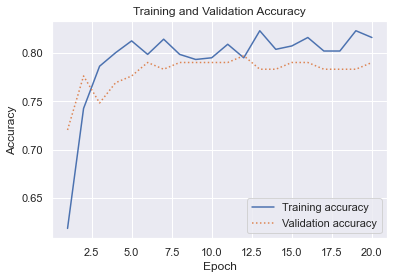

In [49]:
#### train model and plot results ####

model = Sequential() 
model.add(Dense(32, activation='relu', input_dim=6)) # 6 columns (survived dus niet)
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25)) # vergeet n random deel weer af en toe zodat hij niet over-learned wordt op deze specifieke dataset
model.add(Dense(1, activation='sigmoid')) # een output van 0 of 1
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # ? binary cossentropy what? (might not need to know)

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=20)

import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

scores = model.evaluate(x_test, y_test, verbose=0) 
print(f'Accuracy: {scores[1]:.1%}')

In [52]:
#### make predictions ####

#choose age
age = 20
#choose one gender to set to 1 (true)
female = 1
male = 0
# choose one class to set to 1 (true)
first_class = 1
second_class = 0
third_class = 0

scaled_age = scaler.transform([[age]])[0][0] 
input = np.array([[scaled_age, female, male, first_class, second_class, third_class]])
probability = model.predict(input)[0][0]
print(f'Probability of survival: {probability:.1%}')
# ? vreemde warning over feature names? heeft iets te maken met fit() misschien?

Probability of survival: 96.5%


C:\Users\vgver\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
